# Box Office Data Visualization using Python - Seaborn

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd

# To view all columns in the dataframe
pd.set_option('max_columns',None)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sn
from wordcloud import WordCloud

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls

## Load the Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,tagline,title,Keywords,revenue,collection_name,has_collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),production_company_New Line Cinema,production_company_Touchstone Pictures,production_company_Walt Disney Pictures,production_company_Columbia Pictures Corporation,production_company_TriStar Pictures,production_company_Relativity Media,production_company_Canal+,production_company_United Artists,production_company_Miramax Films,production_company_Village Roadshow Pictures,production_company_Regency Enterprises,production_company_BBC Films,production_company_Dune Entertainment,production_company_Working Title Films,production_company_Fox Searchlight Pictures,production_company_StudioCanal,production_company_Lionsgate,production_company_DreamWorks SKG,production_company_Fox 2000 Pictures,production_company_Summit Entertainment,production_company_Hollywood Pictures,production_company_Orion Pictures,production_company_Amblin Entertainment,production_company_Dimension Films,num_countries,production_country_United States of America,production_country_United Kingdom,production_country_France,production_country_Germany,production_country_Canada,production_country_India,production_country_Italy,production_country_Japan,production_country_Australia,production_country_Russia,production_country_Spain,production_country_China,production_country_Hong Kong,production_country_Ireland,production_country_Belgium,production_country_South Korea,production_country_Mexico,production_country_Sweden,production_country_New Zealand,production_country_Netherlands,production_country_Czech Republic,production_country_Denmark,production_country_Brazil,production_country_Luxembourg,production_country_South Africa,num_languages,language_English,language_Français,language_Español,language_Deutsch,language_Pусский,language_Italiano,language_日本語,language_普通话,language_हिन्दी,language_,language_Português,language_العربية,language_한국어/조선말,language_广州话 / 廣州話,language_தமிழ்,language_Polski,language_Magyar,language_Latin,language_svenska,language_ภาษาไทย,language_Český,language_עִבְרִית,language_ελληνικά,language_Türkçe,language_Dansk,language_Nederlands,language_فارسی,language_Tiếng Việt,language_اردو,language_Română,num_cast,cast_name_Samuel L. Jackson,cast_name_Robert De Niro,cast_name_Morgan Freeman,cast_name_J.K. Simmons,cast_name_Bruce Willis,cast_name_Liam Neeson,cast_name_Susan Sarandon,cast_name_Bruce McGill,cast_name_John Turturro,cast_name_Forest Whitaker,cast_name_Willem Dafoe,cast_name_Bill Murray,cast_name_Owen Wilson,cast_name_Nicolas Cage,cast_name_Sylvester Stallone,genders_0_cast,genders_1_cast,genders_2_cast,cast_character_,cast_character_Himself,cast_character_Herself,cast_character_Dancer,cast_character_Additional Voices (voice),cast_character_Doctor,cast_character_Reporter,cast_character_Waitress,cast_character_Nurse,cast_character_Bartender,cast_character_Jack,cast_character_Debutante,cast_character_Security Guard,cast_character_Paul,cast_character_Frank,num_crew,crew_name_Avy Kaufman,crew_name_Robert Rodriguez,crew_name_Deborah Aquila,crew_name_James Newton Howard,crew_name_Mary Vernieu,crew_name_Steven Spielberg,crew_name_Luc Besson,crew_name_Jerry Goldsmith,crew_name_Francine Maisler,crew_name_Tricia Wood,crew_name_James Horner,crew_name_Kerry Barden,crew_name_Bob Weinstein,crew_name_Harvey Weinstein,crew_name_Janet Hirshenson,genders_0_crew,genders_1_crew,genders_2_crew,jobs_

## Targetting Revenue for Visualization

Text(0.5, 1.0, 'Log Revenue Distribution')

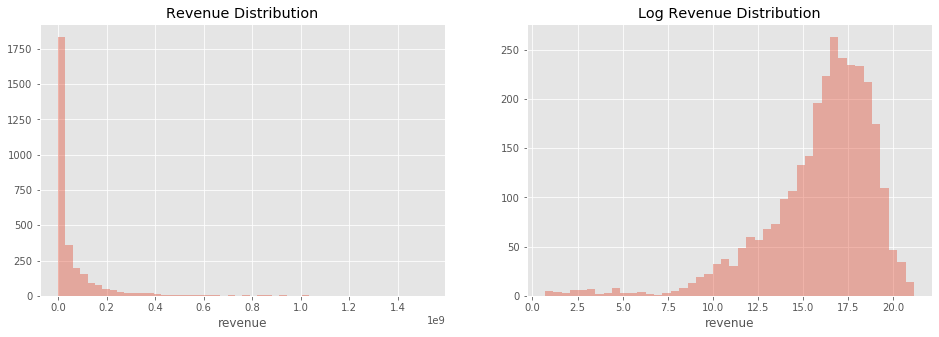

In [4]:
fig,axes = plt.subplots(figsize=(16,5))
plt.subplot(1,2,1)
sn.distplot(train['revenue'],kde=False)
plt.title("Revenue Distribution")
# as observed the graph is skewed, to make it normal and not affect kurtosis on the further operations lets log transform the distribution
plt.subplot(1,2,2)
sn.distplot(np.log1p (train['revenue']),kde=False)
plt.title("Log Revenue Distribution")

### For further operations save this logged distribution to the dataframe

In [5]:
train['logged_revenue'] = np.log1p(train['revenue'])

## Relationship Between Budget and Revenue

Text(0.5, 1.0, 'Logged Budget Vs Logged Revenue')

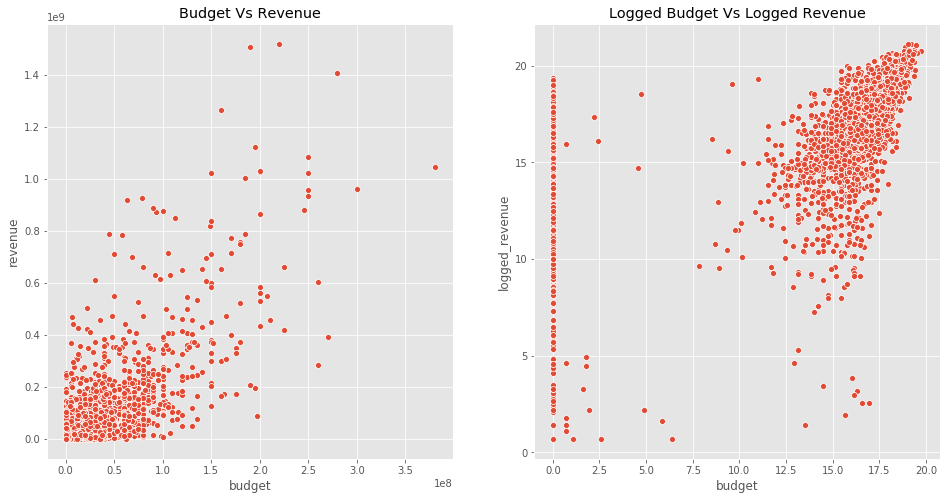

In [6]:
fig,axes = plt.subplots(figsize=(16,8))
plt.subplot(1,2,1)
sn.scatterplot(train['budget'],train['revenue'])
plt.title("Budget Vs Revenue")

# lets log transform both budget and revenue to see if we can see some better relationship
plt.subplot(1,2,2)
sn.scatterplot(np.log1p(train['budget']),train['logged_revenue'])
plt.title("Logged Budget Vs Logged Revenue")

In [7]:
train['logged_budget'] = np.log1p(train['budget'])
test['logged_budget'] = np.log1p(test['budget'])

## Official Homepage And Revenue relationship

In [8]:
train['homepage'].value_counts().head(10)

http://www.transformersmovie.com/                                       4
http://www.lordoftherings.net/                                          2
http://www.thehobbit.com/                                               2
http://www.theofficialjohncarpenter.com/big-trouble-in-little-china/    1
http://www.miramax.com/movie/kill-bill-volume-1/                        1
http://annabellemovie.com/                                              1
http://www.indianajones.com                                             1
http://www.sonyclassics.com/loveisstrange/                              1
http://tracks-movie.com/                                                1
http://www.sonypictures.com/movies/theholiday/                          1
Name: homepage, dtype: int64

Most of homepages are unqiue except the movie with series <br>
So lets create binary entry which will show whether the movie has a homepage or not

In [9]:
train['has_homepage'] = 0 
test['has_homepage'] = 0
train.loc[train['homepage'].isnull() == False, 'has_homepage'] = 1 
test.loc[test['homepage'].isnull() == False, 'has_homepage'] = 1

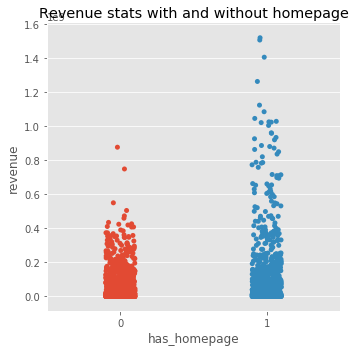

In [10]:
sn.catplot(x='has_homepage',y="revenue",data=train)
plt.title("Revenue stats with and without homepage")
plt.tight_layout()

## Top Languages 
Finding top 10 languages

In [11]:
language_data = train.loc[train['original_language'].isin(train['original_language'].value_counts().head(10).index)]

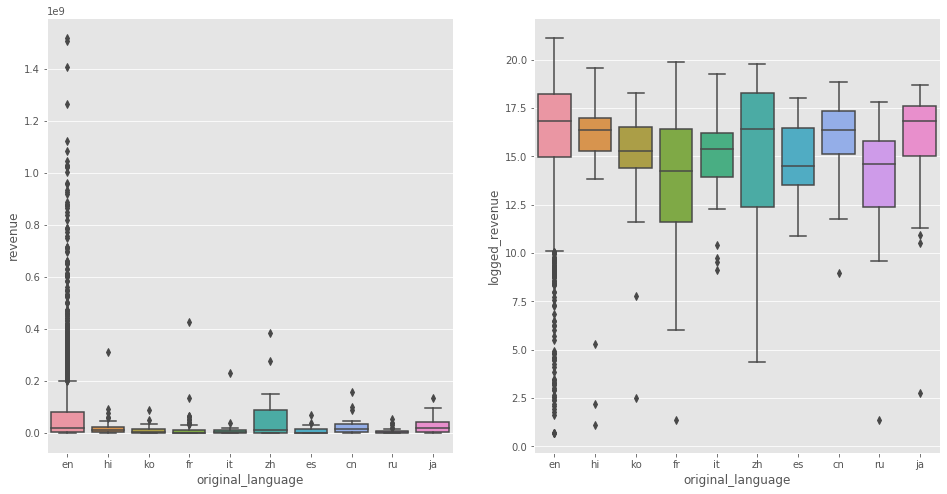

In [12]:
fig,axes = plt.subplots(figsize=(16,8))
plt.subplot(1,2,1)
sn.boxplot(x='original_language',y="revenue",data=language_data)

# now again plot with logged revenue values

plt.subplot(1,2,2)
sn.boxplot(x="original_language",y="logged_revenue",data=language_data)

## Key Words
We will do this by creating Word Cloud

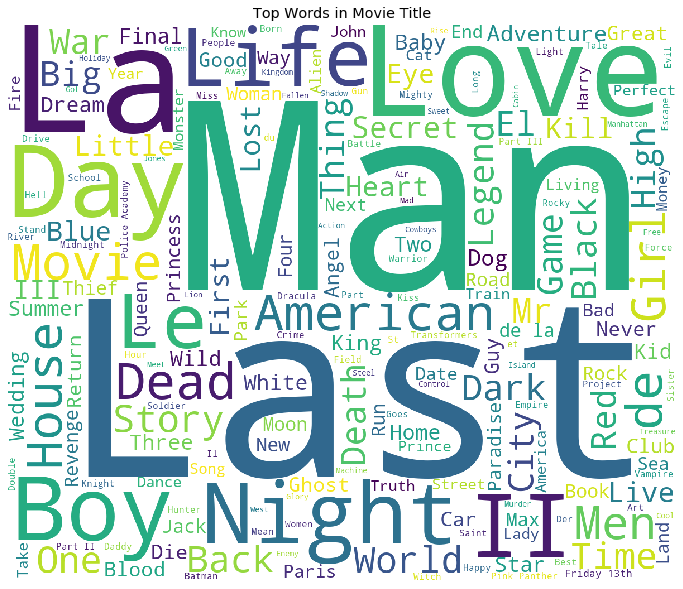

In [13]:
plt.figure(figsize=(12,12))
text = ' '.join(train['original_title'].values) 
wordcloud = WordCloud(max_font_size=None,background_color='white',width = 1200, height = 1000).generate(text)
plt.imshow(wordcloud)
plt.title("Top Words in Movie Title")
plt.axis('off')
plt.show()

### Top words in movie Overviews

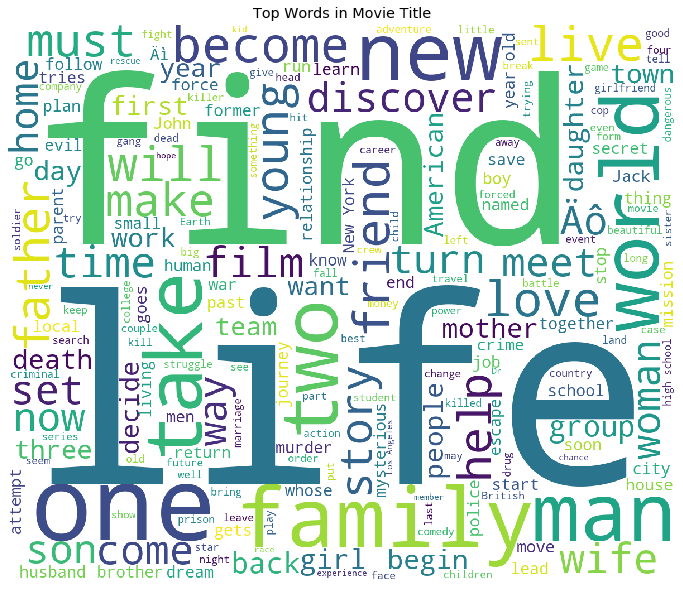

In [14]:
plt.figure(figsize=(12,12))
text = ' '.join(train['overview'].fillna('').values) 
wordcloud = WordCloud(max_font_size=None,background_color='white',width = 1200, height = 1000).generate(text)
plt.imshow(wordcloud)
plt.title("Top Words in Movie Title")
plt.axis('off')
plt.show()

## Descriptions and Overview impact on the Revenue

In [15]:
# Python package used to debug machine classifiers and explain their predictions
import eli5

#importing linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

C:\Users\ImSahil\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning:

The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.

C:\Users\ImSahil\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning:

The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.



To fit the description in Linear Regression model, the words i.e strings are converted TfidfVectorizer which will be numerical

In [16]:
 vectorizer = TfidfVectorizer(
     sublinear_tf = True,
     analyzer = 'word',
     token_pattern = r'\w{1,}',
     ngram_range = {1,2}, # We are using unigrams and bigrams which means words and pairs of words
     min_df = 5 # The words with frequency less than 5 will be ignored
 )
overview_text = vectorizer.fit_transform(train['overview'].fillna(''))
linear_regressor = LinearRegression()
linear_regressor.fit(overview_text, train['logged_revenue'])
eli5.show_weights(linear_regressor,vec = vectorizer, top = 20, feature_filter = lambda x: x!= '<BIAS>')


# Box Office Data Visualization using Python - Plotly

### Analyzing movie release dates

In [17]:
test.loc[test['release_date'].isnull() == False, 'release_date'].head()

0    7/14/07
1    5/19/58
2    5/23/97
3     9/4/10
4    2/11/05
Name: release_date, dtype: object

#### Preprocessing Feature
Fixing Release date column & getting it into standard format

In [18]:
def fix_date(x):
    year = x.split('/')[2]
    if int(year) <= 19:
        return x[:-2] + '20' + year
    else:
        return x[:-2] + '19' + year

In [19]:
test.loc[test['release_date'].isnull() == True].head()

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,tagline,title,Keywords,collection_name,has_collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),production_company_New Line Cinema,production_company_Touchstone Pictures,production_company_Walt Disney Pictures,production_company_Columbia Pictures Corporation,production_company_TriStar Pictures,production_company_Relativity Media,production_company_Canal+,production_company_United Artists,production_company_Miramax Films,production_company_Village Roadshow Pictures,production_company_Regency Enterprises,production_company_BBC Films,production_company_Dune Entertainment,production_company_Working Title Films,production_company_Fox Searchlight Pictures,production_company_StudioCanal,production_company_Lionsgate,production_company_DreamWorks SKG,production_company_Fox 2000 Pictures,production_company_Summit Entertainment,production_company_Hollywood Pictures,production_company_Orion Pictures,production_company_Amblin Entertainment,production_company_Dimension Films,num_countries,production_country_United States of America,production_country_United Kingdom,production_country_France,production_country_Germany,production_country_Canada,production_country_India,production_country_Italy,production_country_Japan,production_country_Australia,production_country_Russia,production_country_Spain,production_country_China,production_country_Hong Kong,production_country_Ireland,production_country_Belgium,production_country_South Korea,production_country_Mexico,production_country_Sweden,production_country_New Zealand,production_country_Netherlands,production_country_Czech Republic,production_country_Denmark,production_country_Brazil,production_country_Luxembourg,production_country_South Africa,num_languages,language_English,language_Français,language_Español,language_Deutsch,language_Pусский,language_Italiano,language_日本語,language_普通话,language_हिन्दी,language_,language_Português,language_العربية,language_한국어/조선말,language_广州话 / 廣州話,language_தமிழ்,language_Polski,language_Magyar,language_Latin,language_svenska,language_ภาษาไทย,language_Český,language_עִבְרִית,language_ελληνικά,language_Türkçe,language_Dansk,language_Nederlands,language_فارسی,language_Tiếng Việt,language_اردو,language_Română,num_cast,cast_name_Samuel L. Jackson,cast_name_Robert De Niro,cast_name_Morgan Freeman,cast_name_J.K. Simmons,cast_name_Bruce Willis,cast_name_Liam Neeson,cast_name_Susan Sarandon,cast_name_Bruce McGill,cast_name_John Turturro,cast_name_Forest Whitaker,cast_name_Willem Dafoe,cast_name_Bill Murray,cast_name_Owen Wilson,cast_name_Nicolas Cage,cast_name_Sylvester Stallone,genders_0_cast,genders_1_cast,genders_2_cast,cast_character_,cast_character_Himself,cast_character_Herself,cast_character_Dancer,cast_character_Additional Voices (voice),cast_character_Doctor,cast_character_Reporter,cast_character_Waitress,cast_character_Nurse,cast_character_Bartender,cast_character_Jack,cast_character_Debutante,cast_character_Security Guard,cast_character_Paul,cast_character_Frank,num_crew,crew_name_Avy Kaufman,crew_name_Robert Rodriguez,crew_name_Deborah Aquila,crew_name_James Newton Howard,crew_name_Mary Vernieu,crew_name_Steven Spielberg,crew_name_Luc Besson,crew_name_Jerry Goldsmith,crew_name_Francine Maisler,crew_name_Tricia Wood,crew_name_James Horner,crew_name_Kerry Barden,crew_name_Bob Weinstein,crew_name_Harvey Weinstein,crew_name_Janet Hirshenson,genders_0_crew,genders_1_crew,genders_2_crew,jobs_Producer

Fixing the null value

In [20]:
test.loc[test['release_date'].isnull() == True, 'release_date' ] = '05/01/00'

In [21]:
train['release_date'] = train['release_date'].apply(lambda x: fix_date(x))
test['release_date'] = test['release_date'].apply(lambda x: fix_date(x))

### Converting date to pandas standard datetime format

In [22]:
train['release_date'] = pd.to_datetime(train['release_date'])
test['release_date'] = pd.to_datetime(test['release_date'])

### Creating features based on release date

In [23]:
def process_date(df):
    date_parts = ['year','weekday','month','weekofyear','day','quarter']
    for part in date_parts:
        part_column = 'release_date' + '_' + part
        df[part_column] = getattr(df['release_date'].dt,part).astype(int)
    return df

train = process_date(train)
test = process_date(test)

### Number of Movies per Year

In [24]:
d1 = train['release_date_year'].value_counts().sort_index()
d2 = test['release_date_year'].value_counts().sort_index()

In [25]:
py.init_notebook_mode(connected = True)

In [26]:
data = [go.Scatter(x = d1.index, y = d1.values, name = 'train'),
       go.Scatter(x = d2.index, y = d2.values, name = 'test' )]

layout = go.Layout(dict(title = 'Number of Movies per Year',
                       xaxis = dict(title = 'Year'),
                       yaxis = dict(title = 'Number of Movies'),
                       ), legend = dict(orientation = 'h')) # set as v for vertical and h for horizontal
py.iplot(dict(data=data, layout = layout))

In [27]:
d1 = train['release_date_year'].value_counts().sort_index()
d2 = train.groupby(['release_date_year'])['revenue'].sum()

data = [go.Scatter(x = d1.index, y = d1.values, name = 'Movie Count'),
       go.Scatter(x = d2.index, y = d2.values, name = 'Total Revenue', yaxis='y2')]

layout = go.Layout(dict(title = 'Number of Movies per Year and Total Revenue',
                       xaxis = dict(title = 'Year'),
                       yaxis = dict(title = 'Number of Movies'),
                       yaxis2 = dict(title = 'Total Revenue', overlaying = 'y', side = 'right'), 
                       ), legend = dict(orientation = 'h')) # set as v for vertical and h for horizontal
py.iplot(dict(data=data, layout = layout))

In [28]:
 d1 = train['release_date_year'].value_counts().sort_index()
d2 = train.groupby(['release_date_year'])['revenue'].mean()

data = [go.Scatter(x = d1.index, y = d1.values, name = 'Movie Count'),
       go.Scatter(x = d2.index, y = d2.values, name = 'Mean Revenue', yaxis='y2')]

layout = go.Layout(dict(title = 'Number of Movies per Year and Total Revenue',
                       xaxis = dict(title = 'Year'),
                       yaxis = dict(title = 'Number of Movies'),
                       yaxis2 = dict(title = 'Mean Revenue', overlaying = 'y', side = 'right'), 
                       ), legend = dict(orientation = 'h')) # set as v for vertical and h for horizontal
py.iplot(dict(data=data, layout = layout))

## Revenue on Different Days of Week

Text(0.5, 1, 'Revenue on Days')

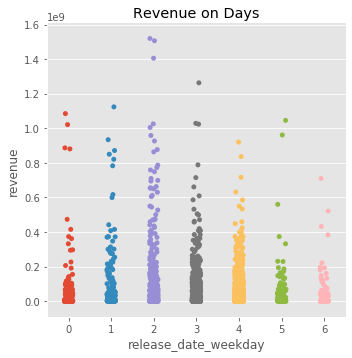

In [29]:
sn.catplot(x='release_date_weekday',y="revenue",data = train)
plt.title('Revenue on Days')

## Runtime and Revenue Relation

Text(0.5, 1.0, 'Distribution of Runtime in hours')

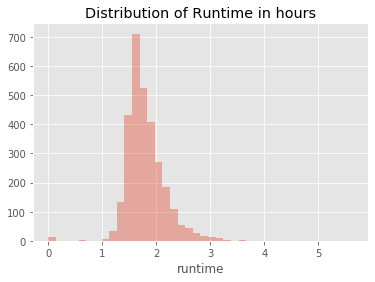

In [30]:
sn.distplot(train['runtime'].fillna(0) / 60, bins=40, kde=False)
plt.title("Distribution of Runtime in hours")

Text(0.5, 1.0, 'Runtime Vs Revenue')

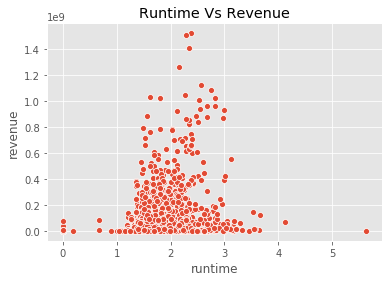

In [31]:
sn.scatterplot(train['runtime'].fillna(0) / 60, train['revenue'])
plt.title("Runtime Vs Revenue")